In [1]:
import pandas as pd
wine_df = pd.read_csv('data/wine_cleared.csv') 
wine_df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


# Задание 2.1
Вычислите наименьший балл за вино в датасете.

In [2]:
w = wine_df['points'].min()
print(f'Наименьший балл за вино в датасете {w} баллов')


Наименьший балл за вино в датасете 80 баллов


# Задание 2.2

Вычислите наименьшую цену за бутылку в наборе данных.

In [3]:
n = round(wine_df['price'].min())
print(f'наименьшая цена за бутылку в наборе данных {n} $')

наименьшая цена за бутылку в наборе данных 4 $


Вычисление среднего также относится к одномерному анализу. Но что значит среднее?

Например, средняя зарплата в Краснодарском крае составляет 43 000 руб. Это число даёт нам представление о среднестатистическом жителе этого края. 

Но что здесь означает средняя зарплата и среднестатистический житель? Среднее арифметическое, середина распределения или что-то другое? Чтобы ответить на этот вопрос, нам необходимо знать, что такое мера центральной тенденции.

### Мера центральной тенденции — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

Далее мы рассмотрим наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода. Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой statistics. Она предоставляет готовые функции для вычисления математической статистики для числовых данных.

Установим библиотеку:

pip install statistics

Импортируем библиотеку для дальнейшего использования:

In [4]:
import statistics

## Среднее арифметическое — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).

### Задание 2.3
Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [5]:
b = statistics.mean(wine_df['price'])
print(f'средняя стоимость бутылки вина {round(b, 2)} $')

средняя стоимость бутылки вина 35.36 $


### Задание 2.4 (Самопроверка)

Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.

In [6]:
round(wine_df['price'].mean(), 2)

35.36

In [7]:
mean = sum(wine_df['price']) / len(wine_df['price'])
print(round(mean, 2))

35.36


Среднее арифметическое хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях. 

Возьмём в пример рост человека. Если в выборке попадутся игроки баскетбольной команды или карлики, представление о среднем росте человека сильно исказится. Если таких значений в выборке будет мало, скорее всего, они будут обработаны на этапе очистки данных от выбросов. Если после очистки данных большой разброс останется, вы можете снова вернуться к этому этапу, так как цикл машинного обучения не линеен, или использовать другую описательную статистику для получения среднего значения.

                                    MЕДИАНА
_______________________
Медиана — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 
___________________

Методы современных библиотек, в том числе и используемой нами statistics для вычисления медианы, самостоятельно выполняют сортировку данных — вам не нужно заботиться об этом. 

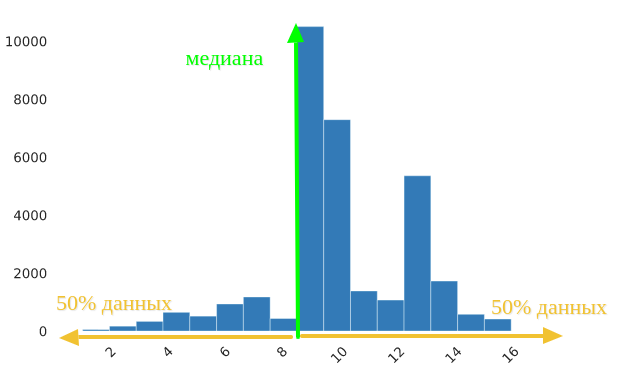

Медиана делит распределение признака ровно пополам

Если количество элементов чётное, медианой будет среднее арифметическое двух средних элементов распределения.

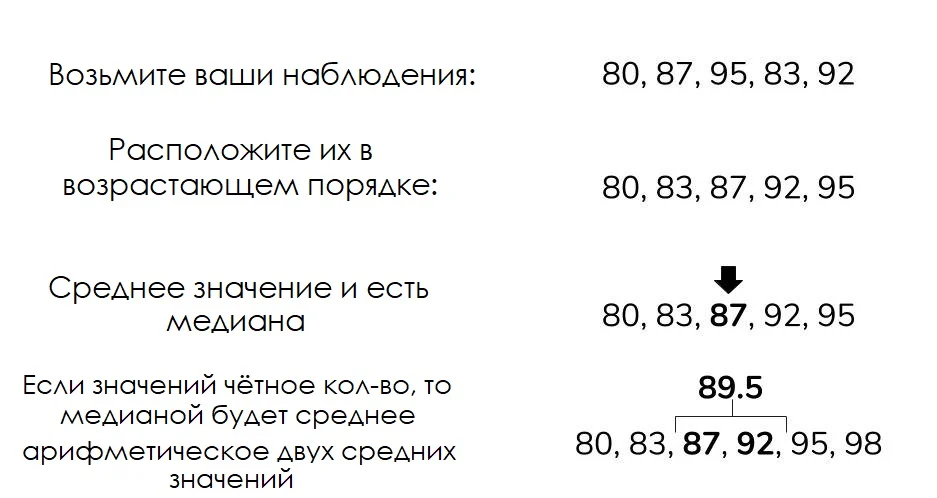

Алгоритм расчёта медианы числового ряда. Источник: Tproger

### Задание 2.5

Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

In [8]:
k = statistics.median(wine_df['price'])
print(f'медиана стоимости бутылки вина {k} $')

медиана стоимости бутылки вина 28.0 $


### Задание 2.6

Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.

Алгоритм нахождения медианы:

- отсортировать элементы серии по возрастанию или убыванию;
- найти средний (средние) элементы в отсортированном наборе данных.
-  Используйте sum() для вычисления суммы всех элементов, sorted() — для сортировки элементов в серии, round() — для округления.
- Используйте % для проверки числа на чётность.

Вставьте получившийся код:

In [9]:
count_price = len(wine_df['price']) # количество записей цен
sorted_price = sorted(wine_df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

В отличие от среднего арифметического медиана хорошо справляется с разбросом в значениях, поэтому её чаще используют. Также медиана разбивает данные на две группы, состоящие из одинакового количества элементов.

Средние значения, например уровень дохода или цена на недвижимость, часто вычисляются именно по медиане, потому что в этом случае важен средний уровень доходов большей части населения. 

В таком случае основатель Amazon Джефф Безосс с годовым доходом в несколько миллиардов не испортит нам всю статистику. 

Также в библиотеке statistics есть функции, связанные с медианой, — функция **statistics.median_low()** и функция **statistics.median_high()**.

→ В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().

В случае, когда количество элементов чётное, у нас получается два средних значения:

- median_low() возвращает меньшее из них;
- median_high() возвращает большее из них.

Примечание. Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.



               МОДА

Мода — самый часто встречающийся элемент в числовом ряду.

Допустим, вы решили полететь в отпуск со своими друзьями и решили выбрать месяц. Вы провели опрос, кому в какой месяц было бы удобнее. Месяцы в году — это числовой ряд от 1 до 12. Дима и Серёжа свободны в феврале. Толя может взять отпуск в любой месяц года, а Ксюша может только в июне. Как в этом случае поступите вы?

Очевидно, выберете месяц, который выбрало большинство; остальные подстроятся либо не полетят с вами.

Чаще всего мода используется в нечисловых рядах. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

Задание 2.7

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [10]:
l = round(statistics.mode(wine_df['price']), 2)
print(f'стоимость бутылки (самую часто встречающуюся цену) вина {l} $')

стоимость бутылки (самую часто встречающуюся цену) вина 35.36 $


Моду также можно вычислить при помощи statistics.multimode(). В случае наличия нескольких модовых (популярных значений) функция statistics.mode() вернёт вам ошибку StatisticsError, а statistics.multimode() — список с всеми вычисленными модовыми значениями.

Задание 2.8

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.

Вставьте получившийся код:

In [11]:
round(wine_df['price'].mode(), 2)

0    35.36
Name: price, dtype: float64

In [12]:
round(wine_df['price'].value_counts(0).index[0], 2)

35.36